# Pitch Identification

In [ ]:
#!pip install ffmpeg

In [1]:
#Imports
import math
import librosa
import librosa.display
import IPython.display as ipd

import pyAudioAnalysis
import pydub
import ffmpeg

from numpy import sin, cos, pi, linspace, arange, log10, absolute
from numpy.random import randn
from scipy.signal import lfilter, lfilter_zi, filtfilt, butter, freqz, welch
from scipy.io.wavfile import read , write
from scipy.signal import spectrogram
from matplotlib import pyplot
from matplotlib.pyplot import ylabel, xlabel
from matplotlib.pyplot import plot, legend, show, grid, figure, savefig#, hold

C:\Users\Dasil\anaconda3\envs\PDS\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
filename = 'audio/training/J_cata_02.wav'
fs, audio1 = read(filename)
f,t,S1 = spectrogram(audio1, fs, window='flattop', nperseg=fs//10, noverlap=fs//20, scaling='spectrum', mode='magnitude')
print('filename: ', filename)
print('Data Length (s): ',t[-1])
print('Sampling frequency (samples/s): ', fs)

#Playing Audio (Reproduce Audio)
ipd.Audio(filename)

filename:  audio/training/J_cata_02.wav
Data Length (s):  5.45
Sampling frequency (samples/s):  44100


Text(0, 0.5, 'frequency(Hz)')

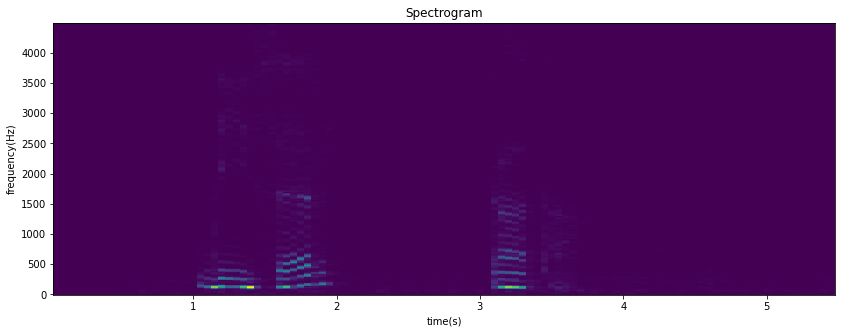

In [3]:
#Spectogram
pyplot.rcParams['figure.figsize'] = 14,5
pyplot.pcolormesh(t, f[:450], S1[:450][:])
pyplot.title("Spectrogram")
xlabel('time(s)')
ylabel('frequency(Hz)')
#show()

In [13]:
#Filtro ButterWord

wn = 1500/(fs/2)
b3,a3 = butter(4, wn)
audio1_filt = lfilter(b3,a3,audio1)

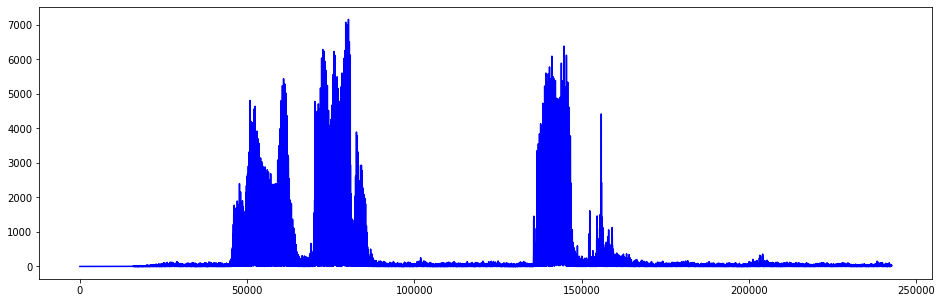

In [14]:
pyplot.rcParams['figure.figsize'] = 16,5
#plot(audio1,'r')
plot(absolute(audio1_filt),'b')

In [ ]:
#result = [1 if item > 0.0004*1e8 else 0 for item in audio1_filt**2]
#plot(result)

# Fix-sized segmentation





In the first part we showed how we can segment a long recording to non-overlapping segments using ffmpeg. The following code sample shows how to do the same with Python. Line 8 does the actual segmentation in a single-line command. Overall, the following script loads and normalizes an audio signal, and then it breaks it into 1-second segments and writes each one of them in a file.





(Pay attention to the note in the last comment: you will need to cast to 16bit before saving to file because the numpy conversion has led to higher sample resolutions).

In [ ]:

# Fix-sized segmentation (breaks a signal into non-overlapping segments)
    #signal = audio1 / (2**15)
    #signal_len = len(signal)
    #segment_size_t = 1 # segment size in seconds
    #segment_size = segment_size_t * fs  # segment size in samples

# Break signal into list of segments in a single-line Python code
    #segments = np.array([signal[x:x + segment_size] for x in
    #                     np.arange(0, signal_len, segment_size)])

# Save each segment in a seperate filename
    #for iS, s in enumerate(segments):
    #    wavfile.write("data/obama_segment_{0:d}_{1:d}.wav".format(segment_size_t * iS,
    #                                                              segment_size_t * (iS + 1)), fs, (s))

# Audio Division 

In [21]:
from pydub import AudioSegment
from pydub.silence import split_on_silence

song = AudioSegment.from_wav(filename)

#Analyze Audio (With audio Segment)
#song = AudioSegment.from_wav(filename)

#Divide Audio in two (The old Way)
#db = -30
#segments = split_on_silence(song, min_silence_len = 100, silence_thresh = db)
#while len(segments) != 2:
#    db = db-1
#    segments = split_on_silence(song, min_silence_len = 100, silence_thresh = db)
#    if db < -90:
#        break

#Segmentation system Audio in two Nuno's way
results = [1 if item > 350 else 0 for item in audio1_filt]

x1 = 0
x2 = 0
x3 = 0
x4 = 0
flag = False
zeros_list = []
silence_len = 7500
change_len = 2000
for i, result in enumerate(results):
    if(flag == False and result == 1):
        if (x1 == 0):
            flag = True
            x1 = i
        elif (i != x1):
            flag = True
            x3 = i
    if(flag == True):
        if(result == 0):
            zeros_list.append(result)
        else:
            zeros_list = []
    if(flag == True and len(zeros_list) >= silence_len):
        if (x2 == 0):
            flag = False
            x2 = i - len(zeros_list)
            if(x2-x1 <= change_len):
                x1 = x2 = 0
        elif (i - len(zeros_list) != x2):
            flag = False
            x4 = i - len(zeros_list)
            break

Div_p = round(((x3-x2)/2)+x2)


# Fix-sized segmentation (breaks a signal into non-overlapping segments)
signal = audio1 / (2**15)
signal_len = len(signal)
segment_size_t = 1 # segment size in seconds
segment_size = segment_size_t * fs  # segment size in samples

# Break signal into list of segments in a single-line Python code
segment1 = audio1[:Div_p]
segment2 = audio1[Div_p:]
segments = [segment1, segment2]


#Find out the number of Segments
#n = len(segments)

# Process each chunk with your parameters
# Save each segment in a seperate filename
for iS, s in enumerate(segments):
    write("audio/data/chunky{0:d}.wav".format(segment_size_t * iS, segment_size_t * (iS + 1)), fs, (s))



# Process each chunk with your parameters
#for i, segment in enumerate(segments):

    # Export the audio chunk with new bitrate.
#    print("Exporting chunk{0}.wav.".format(i))
#    segment.export(
#        "audio/data/chunk{0}.wav".format(i),
#        bitrate = "192k",
#        format = "wav"
#    )


# Pitch Detection 

    Using  the cepstrum coeficient. 

In [7]:
import numpy as np

#Cepstrum and Power Spectrum

def real_cepstrum(x, n=None):
# Compute the real cepstrum of a real sequence
#    x : ndarray
#        Real sequence to compute real cepstrum of.
#    n : {None, int}, optional
#        Length of the Fourier transform.
#    Returns
#    -------
#    ceps: ndarray
#        The real cepstrum.

    spectrum = np.abs(np.fft.fft(x, n=n))**2
    ceps = np.fft.ifft(np.log(spectrum))

    return ceps, spectrum

In [8]:
#Zero Crossing Rate

def ZCR(samples, frameSize, overlap):
    wlen = len(samples)
    step = frameSize - overlap
    frameNum = math.ceil(wlen/step)
    zcr = np.zeros((frameNum,1))
    for i in range(frameNum):
        curFrame = samples[np.arange(i*step,min(i*step+frameSize,wlen))]
        #To avoid DC bias, usually we need to perform mean substraction on each frame
        curFrame = curFrame - np.mean(curFrame) #Zero-Justified
        zcr[i] = sum(curFrame[0:-1]*curFrame[1::]<=0)
    return zcr

In [9]:
def spectral_centroid(x, samplerate=44100):
    magnitudes = np.abs(np.fft.rfft(x)) # magnitudes of positive frequencies
    length = len(x)
    freqs = np.abs(np.fft.fftfreq(length, 1.0/samplerate)[:length//2+1]) # positive frequencies
    return np.sum(magnitudes*freqs) / np.sum(magnitudes) # return weighted mean

In [10]:
import numpy as np
import matplotlib.pyplot as plt

samples = segments[0].get_array_of_samples()
samples = np.array(samples)

#id_filename = 'audio/data/chunk0.wav'
#fs, id_audio = read(id_filename)

#Calculate Cepstrung and Power Spectrum
ceps, spec = real_cepstrum(samples, n=None)
N = samples.shape[0]

#Calculate Zero Cross Rate
frameSize = 256
overlap = 0
zcr = ZCR(samples, frameSize, overlap)

#Calculate Spectral Centroid
spec_cen = spectral_centroid(samples)

NameError: name 'segments' is not defined

In [11]:
#Graphic the samples 
plt.rcParams['figure.figsize'] = 16,5
plot(spec_cen,'b')

NameError: name 'spec_cen' is not defined

In [12]:
#Graphic the samples 
plt.rcParams['figure.figsize'] = 16,5
plot(zcr,'b')

NameError: name 'zcr' is not defined

In [13]:
a = 0
for x in zcr:
    a+= x
    
b = round(a[0])

print(round(np.average(zcr)))

print(b)

19
3192


max value index:  [119]


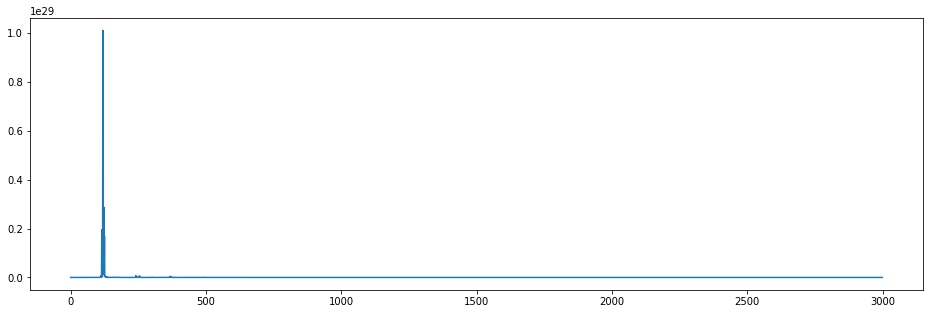

In [14]:
#Power Specturm
power_spec = np.abs(spec[:N//2])**2
plt.plot(power_spec[0:3000])

#Zero Crossing Rate 
#zero_crosses_rate = np.nonzero(np.diff(samples > 0))[0]
#print(zero_crosses_rate)

index = np.where(power_spec == np.max(power_spec))
print('max value index: ', index[0])

469.47090344227394

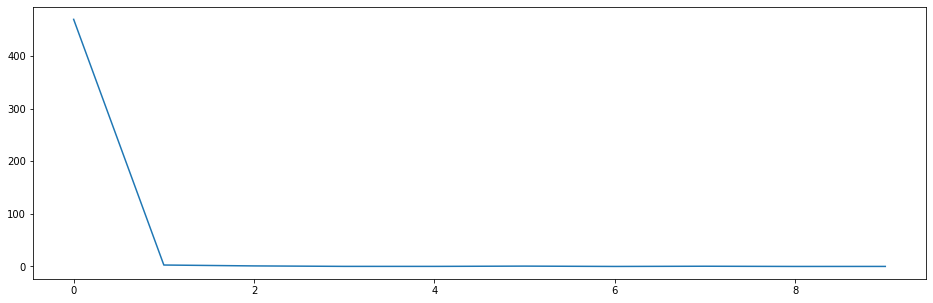

In [16]:
abs_ceps = np.abs(ceps[:N//2])**2
plt.plot(abs_ceps[:10])
np.max(abs_ceps)

In [17]:
print("Power Spectrum: ", index[0], "\n")
print("Power Cepstrum: ", round(np.max(abs_ceps)))

Power Spectrum:  [119] 

Power Cepstrum:  469
